Instructions:

Some things you must know before using this app.:

    -This app helps survey the most recent 100 posts or titles that appear on the finviz.com website for a particular stock symbol. Much thanks to the Python Project for sharing their code in how to scrape the website and the use of nltk's Vader sentiment analyzer to provide the sentiment ratings for each of the titles. The visual summary in the form of a bar chart is also great. The link to the Youtube video is provided below.

[Python Project] Sentiment Analysis and Visualization of Stock News - YouTube https://www.youtube.com/watch?v=o-zM8onpQZY

    -The sentiment analyzer that is used is an industry standard but it is not perfect. You will find titles that appear to have their sentiments mis-rated.

    -This is NOT a stock picker nor is it intended to provide any information on a company's or stock prices' future, present or past performance. Any conclusions made from the information contained here-in are the sole responsibility of the user.
    
    -The information contained here-in is not exhaustive and should not be treated as such.
    
    -The accuracy of the information contained here-in is not verified. It could be wrong. 
    
    -This application assumes a rudimentry understanding of the jupyter notebook environment. If you have absolutely no technical background, find someone who does and who is willing to help you. It may save you hours of frustration. 

To use this app.:

    Run the cell titled "RUN THIS CELL" by selecting this cell (side bar will be blue) and pressing the Run button on the toolbar above (in the jupyter notebook environment there are other ways to run the code.) 

    Enter the stock symbol (not the company's name) you want to research. (It is not case sensitive.)
    
    After you have entered the stock symbol you will be prompted to see if you want to remove what are known as stopwords. Stopwords are words that are generally accepted as conveying no sentiment. If you choose to have them removed it might make the the code run more efficiently.  
    
    You should see a bar chart with the sentiment values for the most recent 100 articles with date listed on the x-axis and the nltk's VADER sentiment value on the y-axis. If no bar chart appears run through the all of the prompts and re-start the app.
    
    Next you will see a pie chart that is divided into "positive," "neutral," and "negative" sentiments and the accompanied statistics.
    
    Following this you will see a word cloud of the titles with postive sentiment. 
    
    To find the posts where these words reside, type in the word in the prompt. These are case sentitive so if your search comes back empty, re-enter the word with changed capitization. For example, start with the first letter of the word capitalized with the rest of the letters in lower case. If that does not yield anything, try all lower case. Make sure your spelling is exactly what is represented in the word cloud. Enter only one word at the prompt.
    
    If you don't want to search on any of the key words, just press "enter" when asked what word to search on.
    
    Next you will see the word cloud for the neutral sentiment titles. Follow the same procedure as above to search or move on.
    
    Next you will see the word cloud for the negative sentiment titles. You have the same opportunity to search titles that have negative sentiments.
    
    When the program is finished, the message "All done ..." will appear.
    
    
    



Rev 1 incorporates simple statistics and sorting based on nltk sentiment ratings. si

Rev 2 incorporates stopwords removal and then plots word clouds based on sentiment ratings.; adds pie chart; search titles
using key word. si

Rev 2.1 changes in the structure of the program. encorporates methods and main into one cell for easier execution.

Rev 2.2 - makes the input fields more robust to aberrant inputs
        - changes "no" to "n" in another key word search request
        - incoporates the loading of the libraries into the main body for ease of execution
        - adds instructions for running the application
        
Rev 2.3 - add capability to remove stopwords from the titles
        - added histogram of sentiment values from the 100 articles (JI)
        - added handling of empty article list for word cloud (if there are no articles, the word cloud is not made)
        - it might be good to add a word count feature ...



In [2]:
# needed to use with jupyter binder
#!pip install urlib.request
!pip install bs4
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install numpy 
#!pip install time
!pip install wordcloud

Requirement already satisfied: bs4 in c:\programdata\anaconda3\lib\site-packages (0.0.1)
Requirement already satisfied: beautifulsoup4 in c:\programdata\anaconda3\lib\site-packages (from bs4) (4.9.1)
Requirement already satisfied: soupsieve>1.2 in c:\programdata\anaconda3\lib\site-packages (from beautifulsoup4->bs4) (2.0.1)
Requirement already satisfied: nltk in c:\programdata\anaconda3\lib\site-packages (3.5)
Requirement already satisfied: joblib in c:\programdata\anaconda3\lib\site-packages (from nltk) (0.16.0)
Requirement already satisfied: click in c:\programdata\anaconda3\lib\site-packages (from nltk) (7.1.2)
Requirement already satisfied: tqdm in c:\users\pstri\appdata\roaming\python\python38\site-packages (from nltk) (4.60.0)
Requirement already satisfied: regex in c:\programdata\anaconda3\lib\site-packages (from nltk) (2020.6.8)
Requirement already satisfied: pandas in c:\users\pstri\appdata\roaming\python\python38\site-packages (1.2.4)
Requirement already satisfied: numpy>=1.16.5 in c:\users\pstri\appdata\roaming\python\python38\site-packages (from pandas) (1.19.5)
Requirement already satisfied: pytz>=2017.3 in c:\programdata\anaconda3\lib\site-packages (from pandas) (2020.1)
Requirement already satisfied: python-dateutil>=2.7.3 in c:\programdata\anaconda3\lib\site-packages (from pandas) (2.8.1)
Requirement already satisfied: six>=1.5 in c:\programdata\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas) (1.15.0)
Requirement already satisfied: matplotlib in c:\programdata\anaconda3\lib\site-packages (3.2.2)
Requirement already satisfied: python-dateutil>=2.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib) (2.8.1)
Requirement already satisfied: numpy>=1.11 in c:\users\pstri\appdata\roaming\python\python38\site-packages (from matplotlib) (1.19.5)
Requirement already satisfied: kiwisolver>=1.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib) (1.2.0)
Requirement already satisfied: cycler>=0.10 in c:\programdata\anaconda3\lib\site-packages (from matplotlib) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib) (2.4.7)
Requirement already satisfied: six>=1.5 in c:\programdata\anaconda3\lib\site-packages (from python-dateutil>=2.1->matplotlib) (1.15.0)
Requirement already satisfied: numpy in c:\users\pstri\appdata\roaming\python\python38\site-packages (1.19.5)
Requirement already satisfied: wordcloud in c:\programdata\anaconda3\lib\site-packages (1.8.1)
Requirement already satisfied: pillow in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (7.2.0)
Requirement already satisfied: numpy>=1.6.1 in c:\users\pstri\appdata\roaming\python\python38\site-packages (from wordcloud) (1.19.5)
Requirement already satisfied: matplotlib in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: python-dateutil>=2.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.2.0)
Requirement already satisfied: cycler>=0.10 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: six>=1.5 in c:\programdata\anaconda3\lib\site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


What is the symbol of the stock? (Please enter only one.)jnj
Do you want to remove the stopwords from the titles? [press "enter" for no]y

The stopwords will be removed. 

['jnj']


<Figure size 720x576 with 0 Axes>

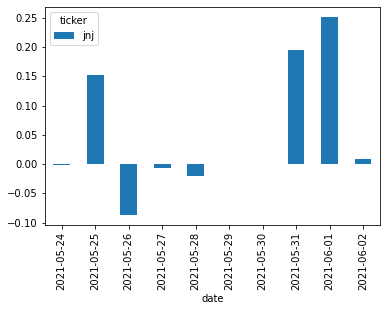

Date Range of the 100 most recent articles: 
Most Recent Article Date:  2021-06-02
Oldest Article Date:  2021-05-24 



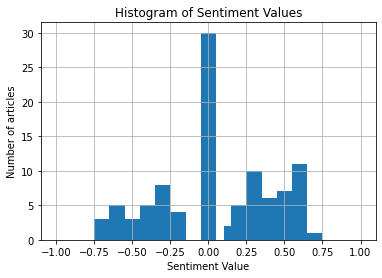

NOTE: The 0.0 bar contains both neutral and no comment sentiments. 

['jnj']
The percent of articles with Positive, Neutral and Negative sentiment.


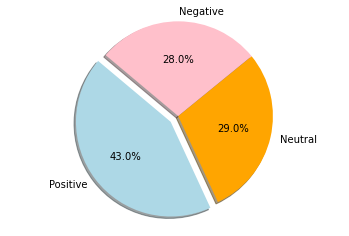


*****************
POSITIVE SENTIMENT: 
The number of positive sentiment numbers is:  43
The percent of postive sentiment numbers is:  43.0 % 



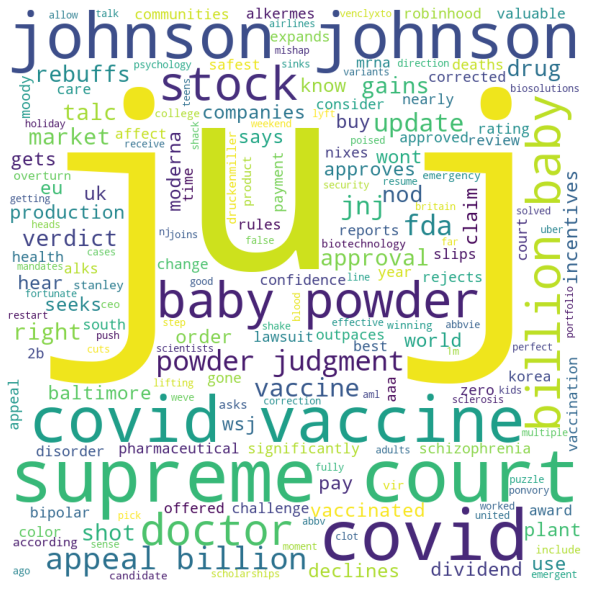

What is the key word you want to search? [press "enter" for none]Supreme
2021-06-01 Supreme Court Rules Johnson & Johnson Must Pay $2.1 Billion in Baby Powder Lawsuit
2021-06-01 Supreme Court Wont Consider Johnson & Johnson Challenge to Baby Powder Judgment
2021-06-01 Supreme Court Wont Hear J&Js Appeal of $2.1 Billion Baby Powder Verdict
2021-06-01 UPDATE 4-U.S. Supreme Court rebuffs J&J appeal over $2 billion baby powder judgment
2021-06-01 Supreme Court rejects Johnson & Johnsons appeal of $2 billion baby-powder verdict
2021-06-01 CORRECTED-UPDATE 2-U.S. Supreme Court rebuffs J&J appeal over $2 billion baby powder judgment
2021-06-01 U.S. Supreme Court rebuffs J&J appeal over $2 billion baby powder judgment
2021-06-01 U.S. Supreme Court declines to hear J&J appeal over $2 billion baby powder judgment
2021-06-01 J&J Slips After U.S. Supreme Court Declines Review $2B Order
2021-05-31 Johnson & Johnson asks Supreme Court to overturn $2 billion talc product verdict
Do you want to do ano

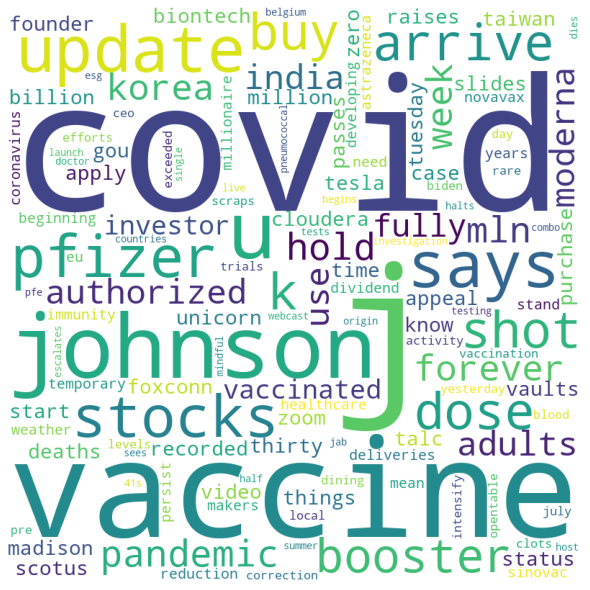

What is the key word you want to search? [press "enter" for none]
Moving on ...

*****************
NEGATIVE SENTIMENT: 
The number of negative sentiment numbers is:  28
The percent of negativetive sentiment numbers is:  28.000000000000004 % 



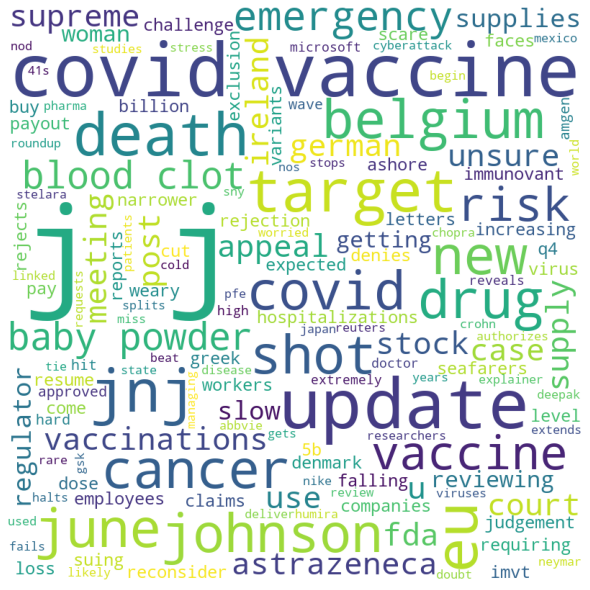

What is the key word you want to search? [press "enter" for none]
All done ...


In [1]:
#Title: RUN THIS CELL

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

#### METHODS ####

def remove_stopwords(): #provides a comprehensive list of stopwords; returns 'stopWords'

    #440
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords

    #450
    stopWords = set(stopwords.words('english'))

    #print(len(stopWords))

    #470 creates a list of new stopwords and then adds them to the set provided by nltk
    # Note: it is case sensitive

    newStopWords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
    newStopWords += ['again', 'against', 'all', 'almost', 'alone', 'along']
    newStopWords += ['already', 'also', 'although', 'always', 'am', 'among']
    newStopWords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
    newStopWords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
    newStopWords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
    newStopWords += ['because', 'become', 'becomes', 'becoming', 'been']
    newStopWords += ['before', 'beforehand', 'behind', 'being', 'below']
    newStopWords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
    newStopWords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
    newStopWords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
    newStopWords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
    newStopWords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
    newStopWords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
    newStopWords += ['every', 'everyone', 'everything', 'everywhere', 'except']
    newStopWords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
    newStopWords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
    newStopWords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
    newStopWords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
    newStopWords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
    newStopWords += ['herself', 'him', 'himself', 'his', 'how', 'however']
    newStopWords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
    newStopWords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
    newStopWords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
    newStopWords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
    newStopWords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
    newStopWords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
    newStopWords += ['nevertheless', 'next', 'nine', 'nobody', 'none'] #removed 'no'
    newStopWords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
    newStopWords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
    newStopWords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
    newStopWords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
    newStopWords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
    newStopWords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
    newStopWords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
    newStopWords += ['some', 'somehow', 'someone', 'something', 'sometime']
    newStopWords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
    newStopWords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
    newStopWords += ['then', 'thence', 'there', 'thereafter', 'thereby']
    newStopWords += ['therefore', 'therein', 'thereupon', 'these', 'they']
    newStopWords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
    newStopWords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
    newStopWords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
    newStopWords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
    newStopWords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
    newStopWords += ['whatever', 'when', 'whence', 'whenever', 'where']
    newStopWords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
    newStopWords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
    newStopWords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
    newStopWords += ['within', 'without', 'would', 'yet', 'you', 'your']
    newStopWords += ['yours', 'yourself', 'yourselves'] #provided by Codecademy??

    # additional stopwords:
    newStopWords += ['[Screenshot]', '[screenshot]', 'Screenshot', '[Screenshot]Great', '[SCREENSHOT]', 'screenshot', 
                 'The', 'the', 'SMART', 'yah', 'got', 'nutty', 'moving', 'weeks', 'Got', 'So', 'today', 'Been', 'or',
                    "n't"]

    newStopWords += ['I', 'it', 'It'] # pronouns

    newStopWords += ['AMD', 'NVDA','NVDA', 'TSLA', 'GOOG', 'BA', 'FB', 'GOOGL', 'INTC', 'intel', 'Intel', 'CSCO', 'MU', 
                 'SMH', 'TSM','AAPL', 'TSLA', 'CSCO', 'POETF', 'PHOTONICS', 'DD', 'ARWR', 'T', 'INFI', 'AMC', 'ARK',
                'GME', 'NIO', 'QS', 'ADBE', 'MSFT'] # Stock symbols or names

    newStopWords += ['Readytogo123', 'Maddog68','Stocktwits'] # nouns

    newStopWords += ['.', '?', '!', ';', ',', "'"] # punctuation

    newStopWords += ['&', '#', '%', '$', '@'] # symbols

    newStopWords += ['41.75', '530.05', '39', 'Two', 'two',] # numbers

    #adds them to the stopWords list provided by nltk
    for i in newStopWords:
        stopWords.add(i) #stopWords is defined as a "set" in #450 when inputed as english words from nltk;
        # sets cannot be ordered so it must be converted back to a list to be ordered or alphabetized. A set has no duplicate elements.

    #print(len(stopWords))
    #print(stopWords)

    #converts the set to a list
    stopWords_list = list(stopWords)

    #sorts the stopword list
    stopWords_list.sort(key = lambda k : k.lower())
    #print(stopWords_list)
    
    
    #480 This removes words from the list of stopwords and writes list to csv file
    # https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python#:~:text=one%20more%20easy%20way%20to%20remove%20words%20from,%3D%20words%20-%20stopwords%20final_list%20%3D%20list%20%28final_list%29
    #new_words = list(filter(lambda w: w not in stop_words, initial_words))

    WordsToBeRem = ['no'] #words to be removed from the stopword_list
    stopWords = list(filter(lambda w: w not in WordsToBeRem, stopWords_list)) #stopWords_list has been sorted in #470

    #converts the stopword list to a df and then outputs the df to a csv file
    df_stopwords = pd.DataFrame(stopWords, columns = ['stopwords'])
    df_stopwords.to_csv('stopwords.csv', index = False) #writes the csv file
    
    return stopWords

def remove(df, stopWords): #returns a df where the stopwords are removed

    dfScrubbed = df.copy() #This is a deep copy. df.copy(deep = True); deep = True is default

    i = 0
    
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        words = word_tokenize(data) #the title is separated into individual words (tokenized)
        wordsFiltered = []

        for w in words:
            if w not in stopWords:
                wordsFiltered.append(w)
    
        joinedWordsFiltered = ' '.join(wordsFiltered) #combines the individual words into one string
    
        dfScrubbed.iloc[i,1] = joinedWordsFiltered # replaces the recorded in dfAPIScrubbed with the stopWords removed
        #from the 'body'
    
        i += 1
    
    #print(wordsFiltered)

    #print(dfScrubbed.head())

    return(dfScrubbed)

def wc(df): #creates the word cloud
    #from wordcloud import WordCloud, STOPWORDS 
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt 
    import pandas as pd 

    stopwords = set(stopWords) 
    words = ''
    for review in df.title:
        tokens = str(review).split()
        tokens = [i.lower() for i in tokens]
    
        words += ' '.join(tokens) + ' '
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

def kw(df,keyword): # searches a string for key words; if found will print out the date and title
    i = 0
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        a_bool = keyword in data

        if a_bool == True:
            print(df.iloc[i,0], df.iloc[i,1])
        
        i += 1

def search_repeat(df): # provides opportunity to do multiple searches on key words. returns only the appropriate yes or no response.
    key_word = input('What is the key word you want to search? [press "enter" for none]')
    if key_word:
        kw(df, key_word)
        answer = input('Do you want to do another search?')
    else:
        answer = 'no' #if there is not key word that is entered it sets answer to no. - assumes if there is no key word there is no desire to do another search.
    while answer not in yes_answer and answer not in no_answer: # Restricts answer to be either in the yes or no list by continuous looping on it unit input matches either list
        answer = error() # prompts for the correct yes or no response. The correct responses are in the yes_answer list and no_answer list.
    return answer

def error(): # provides user the opportunity to correct the user's input
    correction = input('Your input needs to be either a "y" or a "n". Would you like to do another search?')
    return correction

def error1(): # provides user the opportunity to correct the user's input
    correction = input('Your input needs to be either a "y" or a "n". Would you like to remove the stopwords from the titles?')
    return correction

def stopwords_yes_no(): # provides opportunity to removes stopwords from the titles. returns only the appropriate yes or no response.
    yes_no = input('Do you want to remove the stopwords from the titles? [press "enter" for no]')
    if yes_no in yes_answer:
        answer = 'yes'
    else:
        answer = 'no' #if there is not key word that is entered it sets answer to no. - assumes if there is no key word there is no desire to do another search.
    while answer not in yes_answer and answer not in no_answer: # Restricts answer to be either in the yes or no list by continuous looping on it unit input matches either list
        answer = error1() # prompts for the correct yes or no response. The correct responses are in the yes_answer list and no_answer list.
    return answer
    
#### MAIN ####

yes_answer = ['yes','YES','Yes','y','Y']
no_answer = ['no', 'NO', 'No', 'n', 'N']

symbol = input('What is the symbol of the stock? (Please enter only one.)')

#### SCRAPES FINVIZ

finviz_url = 'https://www.finviz.com/quote.ashx?t='
#tickers = ['NVDA', 'SLV', 'MU']
tickers = [symbol]

news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers = {'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table
    
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1: # if there is both a date and time it parses them into two columns
            time = date_data[0]
        else: 
            date = date_data[0] 
            time = date_data[1]
        parsed_data.append([ticker, date, time, title])
        
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

#### REMOVES STOPWORDS

sw_answer = stopwords_yes_no() #returns either a 'yes' or 'no' from the user's input
if sw_answer == 'yes':
    stopWords = remove_stopwords() #provides a comprehensive list of stopwords; returns 'stopWords'
    dfScrubbed = remove(df, stopWords) #returns a df where the stopwords are removed
    print('\nThe stopwords will be removed. \n')

#### PERFORMS THE VADER SENTIMENT ANALYSIS.
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']

if sw_answer == 'yes': #uses dfScrubbed to generate sentiment values if uses said yes
    df['compound'] = dfScrubbed['title'].apply(f) # uses the scrubbed title data to generate the sentiment score and places the result back into the non-scrubbed df
else:
    df['compound'] = df['title'].apply(f) # does not uses the scrubbed titles to produce the sentiment values


#print(df.head()) # commented out by si
#print(len(df)) # commented out by si

#### PLOTS SENTIMENT VALUES AS A FUNCTION OF DATES
df ['date'] = pd.to_datetime(df.date).dt.date        
        
plt.figure(figsize = (10 ,8))

mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()

mean_df.plot(kind = 'bar')

print(tickers)
plt.show()

import time
time.sleep(1.0)

#### PROVIDES DATE RANGES AND SIMPLE STATISTICS ON THE SENTIMENT OF THE TITLES

# provides date ranges for the last 100 articles; added by si
print('Date Range of the 100 most recent articles: ') #added by si
print('Most Recent Article Date: ', df.iloc[0,1]) #added by si
#print('Oldest Article Date: ', df.iloc[99,1], '\n') #added by si
oldest = len(df) - 1
print('Oldest Article Date: ', df.iloc[oldest,1], '\n') #added by si


# provides basic sentiment statistics; added by si
i = 0 # set starting index number to 0
pos_counter = 0 # sets starting positive counter to 0
neu_counter = 0
neg_counter = 0

dfpos = pd.DataFrame(columns = ['date', 'title']) #initializes df where positive titles are stored
dfneu = pd.DataFrame(columns = ['date', 'title'])
dfneg = pd.DataFrame(columns = ['date', 'title'])

# for the sentiment histogram
sent_hist = []

# Separate the sentiment values into pos, neu, and neg
while i < len(df):
    sent_hist.append(df.iloc[i,4]) # added for the sentiment histogram
    if df.iloc[i,4] > 0.0:
        pos_counter += 1
        dfpos = dfpos.append(dict(zip(dfpos.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True) #fill dfpos df

    elif df.iloc[i,4] == 0.0:
            neu_counter += 1
            dfneu = dfneu.append(dict(zip(dfneu.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True)

    elif df.iloc[i,4] < 0.0:
            neg_counter += 1
            dfneg = dfneg.append(dict(zip(dfneg.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True)
            
    i += 1
    
#### SENTIMENT HISTOGRAM
sent_hist = np.asarray(sent_hist)
plt.figure()
#plt.hist(sent_hist, bins=20, range=[-1.0, 1.0])
plt.hist(sent_hist, bins=[-1.0,-0.95,-0.85,-0.75, -0.65, -0.55, -0.45, -0.45, -0.35, -0.25, -0.15,
                          -0.05, 0.05, 0.10, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 
                          1.0], range = [-1.0, 1.0]) 
plt.title('Histogram of Sentiment Values')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of articles')
plt.grid()
plt.show()

time.sleep(1)

print('NOTE: The 0.0 bar contains both neutral and no comment sentiments. \n')

#### PIE CHART

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos_counter, neu_counter, neg_counter]
colors = ['lightblue', 'orange', 'pink']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

print(tickers)
print('The percent of articles with Positive, Neutral and Negative sentiment.')
plt.show()

#### produces the word clouds; added by si
print('\n*****************')
print('POSITIVE SENTIMENT: ')
print('The number of positive sentiment numbers is: ', pos_counter)
print('The percent of postive sentiment numbers is: ', pos_counter/len(df) * 100,'% \n')

time.sleep(1)
if pos_counter != 0:
    wc(remove(dfpos,remove_stopwords())) #creates the word cloud
else:
    print('There are no positive articles.')

#### Title searches on key words for postive ratings

time.sleep(1)
repeat = 'yes' #initializes repeat to 'yes'; the user can/will change this in the search_repeat() method
    
while repeat in yes_answer:
    repeat = search_repeat(dfpos)

print('Moving on ...')

time.sleep(1)

print('\n*****************')
print('NEUTRAL SENTIMENT:')
print('The number of neutral sentiment numbers is: ', neu_counter)
print('The percent of neutral sentiment numbers is: ', neu_counter/len(df) * 100,'% \n')

if neu_counter != 0:
    wc(remove(dfneu,remove_stopwords())) #creates the word cloud
else:
    print('There are no neutral articles.')

#### Title searches on key words for neutral ratings
time.sleep(1)
repeat = 'yes'
while repeat in yes_answer:
    repeat = search_repeat(dfneu)

print('Moving on ...')

time.sleep(1)

print('\n*****************')
print('NEGATIVE SENTIMENT: ')
print('The number of negative sentiment numbers is: ', neg_counter)
print('The percent of negativetive sentiment numbers is: ', neg_counter/len(df) * 100,'% \n')

if neg_counter != 0:
    wc(remove(dfneg,remove_stopwords())) #creates the word cloud
else:
    print('There are no negative articles.')

#### Title searches on key words for negative ratings
time.sleep(1)
repeat = 'yes'
while repeat in yes_answer:
    repeat = search_repeat(dfneg)

print('All done ...')


In [94]:
# to install in jupyter cell
!pip install wordcloud
# to install from cmd line
pip install wordcloud

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))